In [9]:
import requests
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100




In [10]:
from bs4 import BeautifulSoup
import pandas as pd

reviews = []
for i in range(1, pages + 1):
    print(f"Scrapping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)

    content = response.content
    parsed_content = BeautifulSoup(content, "html.parser")
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scrapping page 1
   ---> 100 total reviews
Scrapping page 2
   ---> 200 total reviews
Scrapping page 3
   ---> 300 total reviews
Scrapping page 4
   ---> 400 total reviews
Scrapping page 5
   ---> 500 total reviews
Scrapping page 6
   ---> 600 total reviews
Scrapping page 7
   ---> 700 total reviews
Scrapping page 8
   ---> 800 total reviews
Scrapping page 9
   ---> 900 total reviews
Scrapping page 10
   ---> 1000 total reviews


In [11]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Prior to boarding a gate a...
1,✅ Trip Verified | I flew from Amsterdam to L...
2,"✅ Trip Verified | First the good news, the clu..."
3,✅ Trip Verified | I have never travelled wit...
4,"✅ Trip Verified | Terrible overall, medium ser..."


In [12]:
df.reviews = df.reviews.str.split('|' , expand=True)[1]

In [13]:
df.head()

,reviews
0,Prior to boarding a gate agent seemed to pi...
1,I flew from Amsterdam to Las Vegas with a l...
2,"First the good news, the club suites are such..."
3,I have never travelled with British airways...
4,"Terrible overall, medium service and the flig..."


In [14]:
#CLEAN OF DATASET
#1.Cleaning an text
import re
def clean(text):
    text = re.sub("[^A-Za-z]+", " " , str(text))
    return text
    
df["Cleaned Reviews"] = df["reviews"].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...
1,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...
2,"First the good news, the club suites are such...",First the good news the club suites are such ...
3,I have never travelled with British airways...,I have never travelled with British airways b...
4,"Terrible overall, medium service and the flig...",Terrible overall medium service and the fligh...


In [15]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRANAV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRANAV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRANAV\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist=[]
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word,pos_dict.get(tag[0])]))

    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PRANAV\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PRANAV\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...,"[(Prior, r), (boarding, v), (gate, n), (agent,..."
1,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ..."
2,"First the good news, the club suites are such...",First the good news the club suites are such ...,"[(First, r), (good, a), (news, n), (club, n), ..."
3,I have never travelled with British airways...,I have never travelled with British airways b...,"[(never, r), (travelled, v), (British, n), (ai..."
4,"Terrible overall, medium service and the flig...",Terrible overall medium service and the fligh...,"[(Terrible, a), (overall, a), (medium, n), (se..."


In [24]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,lemma
0,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...,"[(Prior, r), (boarding, v), (gate, n), (agent,...",Prior board gate agent seem pick elderly peo...
1,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ...",fly Amsterdam Las Vegas layover Heathrow Nov...
2,"First the good news, the club suites are such...",First the good news the club suites are such ...,"[(First, r), (good, a), (news, n), (club, n), ...",First good news club suite huge improvement ...
3,I have never travelled with British airways...,I have never travelled with British airways b...,"[(never, r), (travelled, v), (British, n), (ai...",never travel British airway first time choos...
4,"Terrible overall, medium service and the flig...",Terrible overall medium service and the fligh...,"[(Terrible, a), (overall, a), (medium, n), (se...",Terrible overall medium service flight delay...


In [23]:
df[['reviews' , 'lemma']]

,reviews,lemma
0,Prior to boarding a gate agent seemed to pi...,Prior
1,I flew from Amsterdam to Las Vegas with a l...,fly
2,"First the good news, the club suites are such...",First
3,I have never travelled with British airways...,never
4,"Terrible overall, medium service and the flig...",Terrible
...,...,...
995,I have to say travelling in Club Europe is a ...,say
996,I had a stress free journey with my 8 yr old...,stress
997,Edinburgh to Kuala Lumpur via London. I have...,Edinburgh
998,I was supposed to fly from London City to Am...,suppose


In [25]:
#SENTIMENT ANALYSIS USING VADED
#IT NOT ONLY GIVE STATEMENT IS POS OR NEG BUT ALSO GIVE ITS 'INTENSITY'


In [26]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#func to cal sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['lemma'].apply(vadersentimentanalysis)

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()



,reviews,Cleaned Reviews,POS tagged,lemma,Sentiment,Analysis
0,Prior to boarding a gate agent seemed to pi...,Prior to boarding a gate agent seemed to pick...,"[(Prior, r), (boarding, v), (gate, n), (agent,...",Prior board gate agent seem pick elderly peo...,-0.6486,Negative
1,I flew from Amsterdam to Las Vegas with a l...,I flew from Amsterdam to Las Vegas with a lay...,"[(flew, v), (Amsterdam, n), (Las, n), (Vegas, ...",fly Amsterdam Las Vegas layover Heathrow Nov...,-0.8458,Negative
2,"First the good news, the club suites are such...",First the good news the club suites are such ...,"[(First, r), (good, a), (news, n), (club, n), ...",First good news club suite huge improvement ...,0.9200,Positive
3,I have never travelled with British airways...,I have never travelled with British airways b...,"[(never, r), (travelled, v), (British, n), (ai...",never travel British airway first time choos...,0.9920,Positive
4,"Terrible overall, medium service and the flig...",Terrible overall medium service and the fligh...,"[(Terrible, a), (overall, a), (medium, n), (se...",Terrible overall medium service flight delay...,-0.4767,Negative


In [34]:
df['Analysis'].unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [37]:
#COUNT OF EACH SENTIMENT
count_senti = df['Analysis'].value_counts()
count_senti

Analysis
Positive    458
Negative    428
Neutral     114
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x14654f09a90>,
 [Text(0.1447207802999444, 1.0904383961276196, 'Positive'),
  Text(-0.5177742897621296, -0.9705203680816402, 'Negative'),
  Text(1.2643423691745355, -0.47322127330681485, 'Neutral')],
 [Text(0.0789386074363333, 0.5947845797059743, '45.8%'),
  Text(-0.28242233987025245, -0.5293747462263492, '42.8%'),
  Text(0.7960674176284112, -0.29795413504503154, '11.4%')])

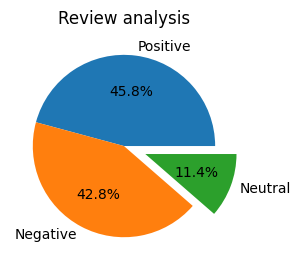

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(1,3,2)
plt.title('Review analysis')
plt.pie(count_senti , labels=count_senti.index , explode=(0,0,0.25), autopct='%1.1f%%')

In [43]:
df.to_csv('BritishAirways_review.csv')

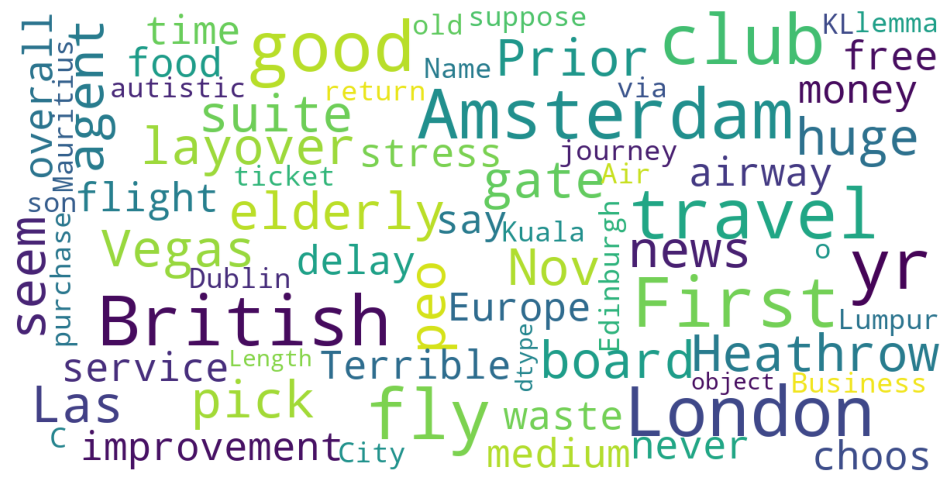

In [58]:

from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))
    fig=plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.lemma)